## Loading all the dependencies

In [ ]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from PIL import Image
import seaborn as sns


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Replace 'your_directory_path' with the actual path to your directory

True_path="/content/drive/MyDrive/photos"
False_path="/content/drive/MyDrive/tfalse"


# Walk through the directory True
for dirpath, _, filenames in os.walk(True_path):
    for file in filenames:
        if file == '.DS_Store':
            os.remove(os.path.join(dirpath, file))
            print(f'Removed: {os.path.join(dirpath, file)}')

# Walk through the directory False
for dirpath, _, filenames in os.walk(False_path):
    for file in filenames:
        if file == '.DS_Store':
            os.remove(os.path.join(dirpath, file))
            print(f'Removed: {os.path.join(dirpath, file)}')

## Mount Google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Convert the pictures into size of 250x250

In [ ]:
import os
from PIL import Image

True_path = "/content/drive/MyDrive/photos"
False_path = "/content/drive/MyDrive/tfalse"
resize_size = (250, 250)

# Function to check if a file is an image
def is_image_file(filename):
    return filename.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))

# Process images in True_path
for root, _, files in os.walk(True_path):
    for img in files:
        img_path = os.path.join(root, img)
        if is_image_file(img):
            try:
                with Image.open(img_path) as img_open:
                    img_resized = img_open.resize(resize_size, Image.LANCZOS)
                    img_resized.save(img_path)
                    print(f"Processed and resized: {img_path}")
            except IOError:
                print(f"Error processing image: {img_path}")
        else:
            print(f"Skipping non-image file: {img_path}")

# Process images in False_path
for root, _, files in os.walk(False_path):
    for img in files:
        img_path = os.path.join(root, img)
        if is_image_file(img):
            try:
                with Image.open(img_path) as img_open:
                    img_resized = img_open.resize(resize_size, Image.LANCZOS)
                    img_resized.save(img_path)
                    print(f"Processed and resized: {img_path}")
            except IOError:
                print(f"Error processing image: {img_path}")
        else:
            print(f"Skipping non-image file: {img_path}")


Processed and resized: /content/drive/MyDrive/photos/IMG_9382.PNG
Processed and resized: /content/drive/MyDrive/photos/IMG_9383.PNG
Processed and resized: /content/drive/MyDrive/photos/IMG_9384.PNG
Processed and resized: /content/drive/MyDrive/photos/IMG_9385.PNG
Processed and resized: /content/drive/MyDrive/photos/IMG_9386.PNG
Processed and resized: /content/drive/MyDrive/photos/IMG_9387.PNG
Processed and resized: /content/drive/MyDrive/photos/IMG_9390.PNG
Processed and resized: /content/drive/MyDrive/photos/IMG_9391.PNG
Processed and resized: /content/drive/MyDrive/photos/IMG_9392.PNG
Processed and resized: /content/drive/MyDrive/photos/IMG_9393.PNG
Processed and resized: /content/drive/MyDrive/photos/IMG_9394.PNG
Processed and resized: /content/drive/MyDrive/photos/IMG_9395.PNG
Processed and resized: /content/drive/MyDrive/photos/IMG_9396.PNG
Processed and resized: /content/drive/MyDrive/photos/IMG_9397.PNG
Processed and resized: /content/drive/MyDrive/photos/IMG_9408.PNG
Processed 

## Converting images into numerical data

In [ ]:
import os
import cv2

True_path = "/content/drive/MyDrive/photos"
False_path = "/content/drive/MyDrive/tfalse"
images = []
labels = []

# Function to check if a file is an image
def is_image_file(filename):
    return filename.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp', '.JPG', '.JPEG'))

# Function to recursively collect images from a directory
def collect_images(directory, label):
    for root, _, files in os.walk(directory):
        for file in files:
            if is_image_file(file):
                img_path = os.path.join(root, file)
                img = cv2.imread(img_path)
                if img is not None:
                    color_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                    images.append(color_img)
                    labels.append(label)
                    print(f"Processed and appended: {file}")
                else:
                    print(f"Error loading image: {img_path}")
            else:
                print(f"Skipping non-image file: {file}")

# Process images in True_path
collect_images(True_path, 1)

# Process images in False_path and its subdirectories
collect_images(False_path, 0)

# Check the shape of the first image in the list
if images:
    print(f"Shape of the first image: {images[0].shape}")
else:
    print("No images loaded.")


Processed and appended: IMG_9382.PNG
Processed and appended: IMG_9383.PNG
Processed and appended: IMG_9384.PNG
Processed and appended: IMG_9385.PNG
Processed and appended: IMG_9386.PNG
Processed and appended: IMG_9387.PNG
Processed and appended: IMG_9390.PNG
Processed and appended: IMG_9391.PNG
Processed and appended: IMG_9392.PNG
Processed and appended: IMG_9393.PNG
Processed and appended: IMG_9394.PNG
Processed and appended: IMG_9395.PNG
Processed and appended: IMG_9396.PNG
Processed and appended: IMG_9397.PNG
Processed and appended: IMG_9408.PNG
Processed and appended: IMG_9409.PNG
Processed and appended: IMG_9418.PNG
Processed and appended: IMG_9419.PNG
Processed and appended: IMG_9420.PNG
Processed and appended: IMG_9421.PNG
Processed and appended: IMG_9422.PNG
Processed and appended: IMG_9423.PNG
Processed and appended: IMG_9424.PNG
Processed and appended: IMG_9425.PNG
Processed and appended: IMG_9426.PNG
Processed and appended: IMG_9427.PNG
Processed and appended: IMG_9430.PNG
P

## Visualize images

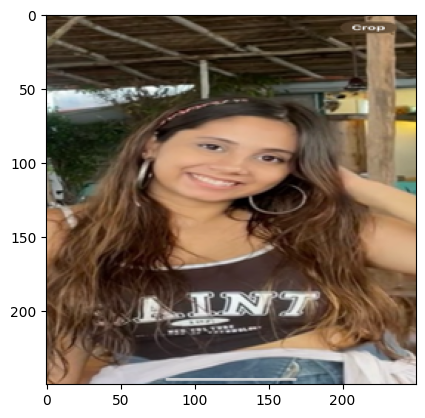

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(images[1])


## Normalize images and shuffling them for randomness

In [ ]:
from sklearn.utils import shuffle
images = np.array(images, dtype='float32') / 255.0
labels = np.array(labels, dtype='int32')
images, labels = shuffle(images, labels, random_state=42)
print(images.shape)
print(labels.shape)


(1230, 250, 250, 3)
(1230,)


## Splitting Training and Test Data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=56)

In [ ]:
input_shape = (250, 250, 3)  # (height, width, channels)
num_classes = 2


# Reshape the input data to 4D tensor
X_train = X_train.reshape((-1, *input_shape))
X_test = X_test.reshape((-1, *input_shape))

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(984, 250, 250, 3)
(246, 250, 250, 3)
(984,)
(246,)


## Defining the Model

In [ ]:


# Define your model architecture (similar to previous examples)
def create_model(input_shape, num_classes):
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])
    return model

# Create the model
input_shape = X_train.shape[1:]  # Assuming X_train shape is (num_samples, height, width, channels)
print(input_shape)
num_classes = 2  # Number of classes
model = create_model(input_shape, num_classes)

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()


(250, 250, 3)
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 248, 248, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 124, 124, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 122, 122, 64)      18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 61, 61, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 59, 59, 128)       73856     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 29, 

## Training the model

In [ ]:
import tensorflow as tf

# Define a callback to save the model at each epoch
checkpoint_path = "model_checkpoint.h5"
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path,
    save_weights_only=True,
    save_best_only=True,
    monitor='val_loss',
    mode='min',
    verbose=1
)

# Train the model
batch_size = 32
epochs =5

history = model.fit(
    X_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(X_test, y_test),
    callbacks=[checkpoint_callback]
)


Epoch 1/5
31/31 [==============================] - ETA: 0s - loss: 0.5377 - accuracy: 0.8313
Epoch 1: val_loss improved from inf to 0.19927, saving model to model_checkpoint.h5
31/31 [==============================] - 193s 6s/step - loss: 0.5377 - accuracy: 0.8313 - val_loss: 0.1993 - val_accuracy: 0.9187
Epoch 2/5
31/31 [==============================] - ETA: 0s - loss: 0.1311 - accuracy: 0.9563
Epoch 2: val_loss improved from 0.19927 to 0.07493, saving model to model_checkpoint.h5
31/31 [==============================] - 193s 6s/step - loss: 0.1311 - accuracy: 0.9563 - val_loss: 0.0749 - val_accuracy: 0.9797
Epoch 3/5
31/31 [==============================] - ETA: 0s - loss: 0.0267 - accuracy: 0.9898
Epoch 3: val_loss did not improve from 0.07493
31/31 [==============================] - 190s 6s/step - loss: 0.0267 - accuracy: 0.9898 - val_loss: 0.2276 - val_accuracy: 0.9675
Epoch 4/5
31/31 [==============================] - ETA: 0s - loss: 0.0220 - accuracy: 0.9939
Epoch 4: val_loss d

## Visualize the loss and accuracy table with epochs

In [ ]:
print(history.history.keys())  # To see what metrics are available


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


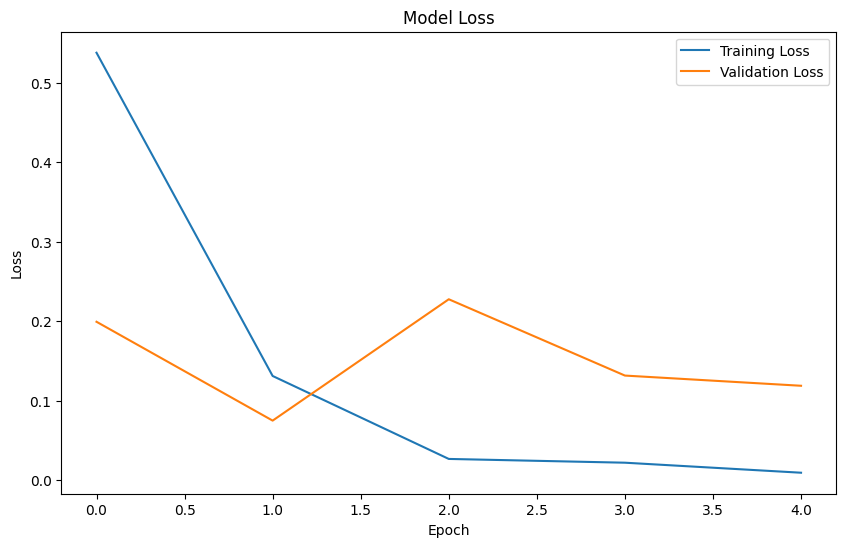

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()



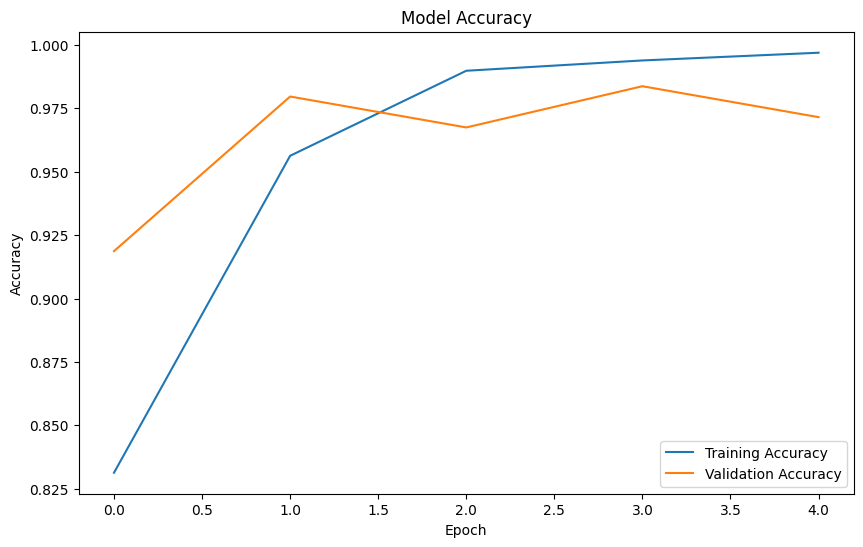

In [ ]:

# Plot training & validation accuracy values
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()


## Evaluate the Model

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)

print(f'Test loss: {loss:.4f}')
print("Accuracy",str(accuracy*100)[:5]+"%")

8/8 [==============================] - 10s 1s/step - loss: 0.1188 - accuracy: 0.9715
Test loss: 0.1188
Accuracy 97.15%


In [ ]:
# Predict labels for the test data
y_pred = model.predict(X_test)

# Predicted class labels
y_pred = np.argmax(y_pred, axis=1)

8/8 [==============================] - 10s 1s/step


## Confusion Matrix

Confusion Matrix:


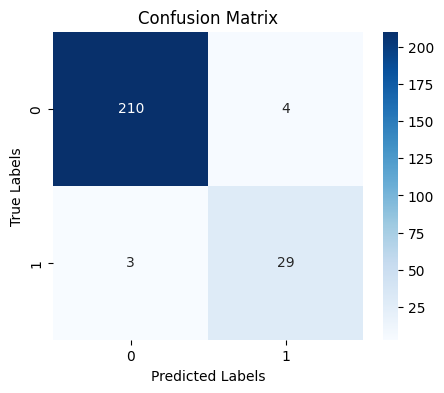

In [ ]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

## Exploring More Models

### 2. Logistic Regression

In [ ]:
print(images.shape)

(1230, 250, 250, 3)


#### Defining Model and training

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


images = images.reshape(images.shape[0], -1)


# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Initialize logistic regression model
model = LogisticRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### Calculating its Accuracy

In [ ]:

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.99


#### Confusion Matrix

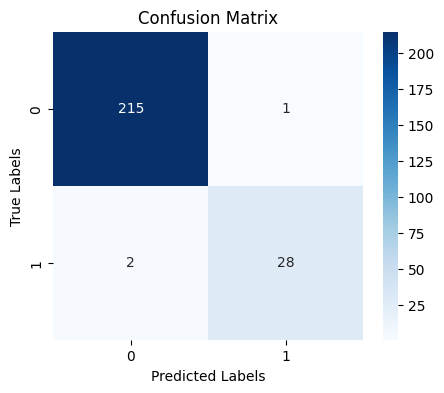

In [ ]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Plot the confusion matrix using Seaborn
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

#### Classification report

In [ ]:
# Generate classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       216
           1       0.97      0.93      0.95        30

    accuracy                           0.99       246
   macro avg       0.98      0.96      0.97       246
weighted avg       0.99      0.99      0.99       246



### 3. SVM

In [ ]:
from sklearn.svm import SVC

# Initialize SVM classifier
svm_model = SVC(kernel='linear', random_state=42)

# Fit the model on the training data
svm_model.fit(X_train, y_train)

# Predict on the test data
y_pred = svm_model.predict(X_test)


#### Accuracy

In [ ]:

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.99


#### Confusion matrix and classification report

Confusion Matrix:


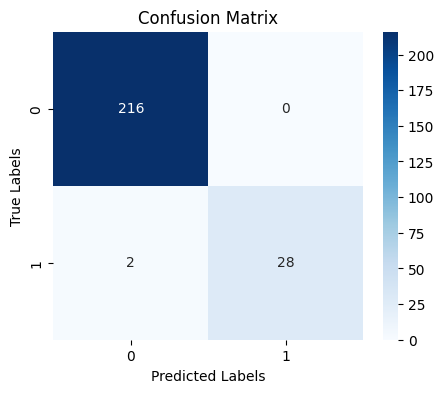

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       216
           1       1.00      0.93      0.97        30

    accuracy                           0.99       246
   macro avg       1.00      0.97      0.98       246
weighted avg       0.99      0.99      0.99       246



In [ ]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
# Plot the confusion matrix using Seaborn
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Generate classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

### 4. Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# Create a decision tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Predict on the test data
y_pred = clf.predict(X_test)



#### Accuracy

In [ ]:
# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9634146341463414


### 5. KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# Initialize KNN classifier
knn_model = KNeighborsClassifier(n_neighbors=5)

# Fit the model on the training data
knn_model.fit(X_train, y_train)

# Predict on the test data
y_pred = knn_model.predict(X_test)


#### Accuracy

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.95


## Conclusion